# 實作乳癌診斷，並繪製ROC曲線

## 載入套件

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

## 載入資料

In [2]:
data = datasets.load_breast_cancer()

In [4]:
print(data.data.shape)

(569, 30)


## 資料分割

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data.data[:,:6], data.target, 
                     test_size=0.20)

## 模型訓練

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC(probability=True))

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

## 模型預測

In [7]:
y_pred_proba = pipe.predict_proba(X_test)
np.around(y_pred_proba, 2)

array([[1.  , 0.  ],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.79, 0.21],
       [0.01, 0.99],
       [0.94, 0.06],
       [0.55, 0.45],
       [0.93, 0.07],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.78, 0.22],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.1 , 0.9 ],
       [0.83, 0.17],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.22, 0.78],
       [0.03, 0.97],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.74, 0.26],
       [0.67, 0.33],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.44, 0.56],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.92, 0.08],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.96, 0.04],
       [0.02, 0.98],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.9 ,

## 預測值(第2欄)與實際值合併

In [8]:
df = pd.DataFrame({'predict':np.around(y_pred_proba[:,1], 2), 'actual':y_test})
df

,predict,actual
0,0.00,0
1,0.97,1
2,0.99,1
3,0.21,0
4,0.99,1
...,...,...
109,0.97,1
110,0.98,1
111,0.16,0
112,0.01,0


## 依預測值降冪排序

In [9]:
df2=df.sort_values(by='predict', ascending=False)# 大到小排序
df2

,predict,actual
43,1.0,1
96,1.0,1
51,1.0,1
88,1.0,1
52,1.0,1
...,...,...
58,0.0,0
50,0.0,0
27,0.0,0
21,0.0,0


## 繪製ROC曲線

Text(0.5, 0, '偽陽率')

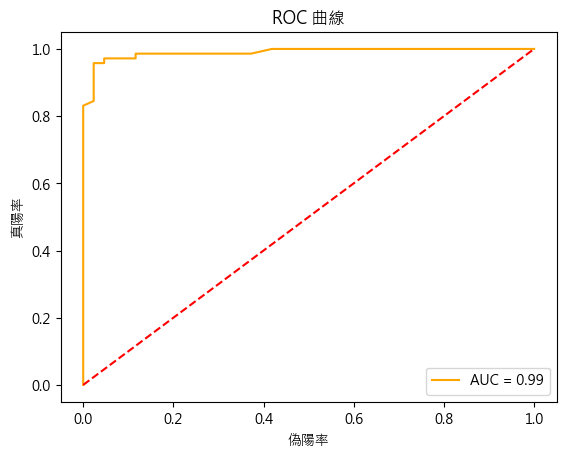

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 修正中文亂碼 
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
auc1 = auc(fpr, tpr)
plt.title('ROC 曲線')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('真陽率')
plt.xlabel('偽陽率')

In [11]:
roc_auc_score(df2.actual, df2.predict)

0.9893547330494596